## 1. Importing Library

In [27]:
import pandas as pd,numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

## 2. Importing News dataset

In [28]:
df = pd.read_excel("NEWS.xlsx")
df.head()

,Unnamed: 0,DESCRIPTION
0,0,Tamil Nadu reported its lowest daily increase ...
1,1,Uttar Pradesh has reported a total of 657 coro...
2,2,A geographical area where six or more people t...
3,3,Rajasthan has reported 72 new coronavirus case...
4,4,The total number of coronavirus cases in Karna...


In [29]:
reviews=pd.DataFrame(df.DESCRIPTION)

In [30]:
reviews

,DESCRIPTION
0,Tamil Nadu reported its lowest daily increase ...
1,Uttar Pradesh has reported a total of 657 coro...
2,A geographical area where six or more people t...
3,Rajasthan has reported 72 new coronavirus case...
4,The total number of coronavirus cases in Karna...
...,...
1121,Microsoft CEO Satya Nadella's wife Anupama Nad...
1122,The government on Tuesday reduced the interest...
1123,A youth was allegedly thrashed by policemen an...
1124,Uttar Pradesh CM Yogi Adityanath has ordered a...


## 3. Making corpus

In [31]:
corpus = " ".join(reviews.DESCRIPTION.values)
corpus

# corpus = "" "+News1+" "+news2+" "+news3......news1125 "
# str="hello world"
# corpus="news1 news2...."

n two weeks, following which a test run will be conducted," a team member said. "Once done, the plan is to make robot-based screening units too," the member added. As many as 19 people tested positive for coronavirus in Indore on Tuesday night, Chief Medical Health Officer Dr Praveen Jadiya has stated. Jadiya added, "Six hundred people have been placed in quarantine in Indore." Further, a health official stated that the total number of positive Covid-19 cases in Madhya Pradesh rose to 86. The number of coronavirus cases in India has risen to 1,637, the Ministry of Health and Family Welfare said on Wednesday. Meanwhile, the death toll due to coronavirus has surged to 38 in the country. Out of the total cases, 1,466 cases are active, while 133 patients have been cured, discharged or migrated. The second batch of the donation from Chinese charity organisations Jack Ma and Alibaba Foundations arrived in Delhi on Tuesday and was received by Indian Red Cross Society. The donation includes pr

In [32]:
type(corpus)

str

In [33]:
corpus[:10]

'Tamil Nadu'

## 4. Wordcloud visualization

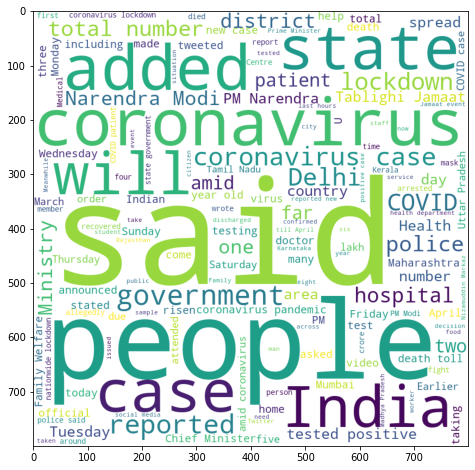

In [34]:
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).generate_from_text(corpus)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## 5. Frequency count and bar plot

In [35]:
# counting frequency of each words in corpus in fdist(freq. distribution)
# fdist[word]=count

fdist = {}
all_terms = corpus.split(" ")
for word in all_terms:
    fdist[word] = fdist.get(word, 0) + 1
# fdist['aditya']= fdist.get('aditya', 0) +100
# fdist['aditya']= fdist.get('aditya', 0) +200
# fdist(keys=values)

,words,freq
20,the,2918
24,to,1875
28,of,1808
7,in,1651
73,and,1335
...,...,...
5561,nights,1
5560,fearsome,1
5559,Nellore,1
5558,"permission,",1


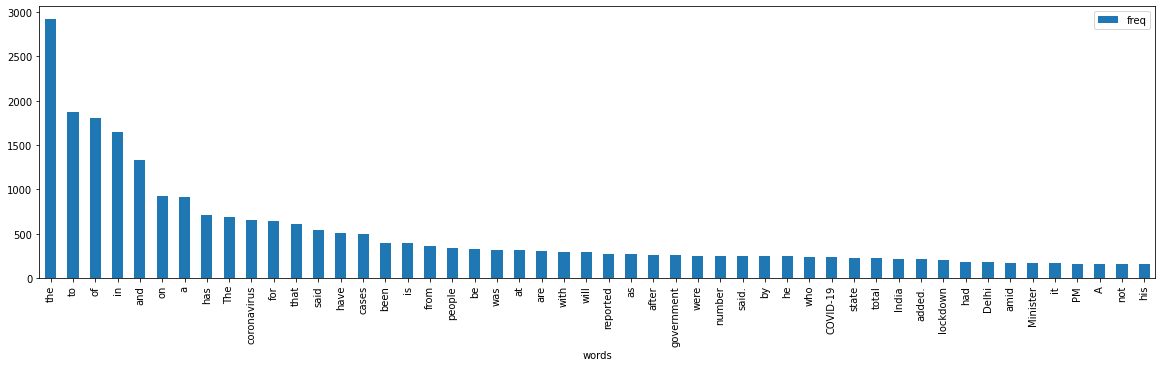

In [36]:

# fdist(keys: values)
# to get all keys: keys= fdist.keys()
# to get all values: val= fdist.values()


freq = {"words":list(fdist.keys()),"freq":list(fdist.values())}
df_dist = pd.DataFrame(freq)
# df_dist

df_dist= df_dist.sort_values(ascending=False, by="freq")
df_dist.head(50).plot.bar(x= "words", y= "freq",figsize=(20,5)) 
df_dist

## 6. Data preprocessing

In [37]:
#1. case: Tokenizing and Normalization
from nltk.tokenize import word_tokenize
corpus_old = word_tokenize(corpus.lower())

print("Total obtained words: ", len(corpus_old))
print("Total unique words: ", len(set(corpus_old)))

Total obtained words:  74990
Total unique words:  7571


In [38]:
#2. case: Removing stopwords and punctuation

from string import punctuation
from nltk.corpus import stopwords

stop_english = stopwords.words("english")
stop_total = stop_english + list(punctuation) + ["..."] + ["coronavirus","bcci","india","ad","positive","covid-19","people","from","peopl","said","added"]


corpus_new = [word for word in corpus_old if word not in stop_total and len(word) > 2]


print("Total obtained words in new corpus: ", len(corpus_new))
print("Total unique words in new corpus: ", len(set(corpus_new)))

Total obtained words in new corpus:  35870
Total unique words in new corpus:  7213


In [39]:
#3. Case: Stemmizing

from nltk.stem import SnowballStemmer
stemmer_english = SnowballStemmer("english")

corpus_final = [stemmer_english.stem(word) for word in corpus_new]


print("Total obtained words in final corpus: ", len(corpus_final))
print("Total unique words in final corpus: ", len(set(corpus_final)))


##player, playing----play

Total obtained words in final corpus:  35870
Total unique words in final corpus:  5601


In [40]:
# A function that will perform all three above case.

def processing(statement):
    # statement: "Tamil Nadu reported it daily cases"
    tokens = word_tokenize(statement.lower())
    # tokens: [tamil, nadu, reported, its, daily, cases]
    unstopped_words = [word for word in tokens if word not in stop_total and len(word) > 2]
    # u_w: [tamil, nadu, reported, lowest, dailiy, cases]
    stemmed_words = [stemmer_english.stem(word) for word in unstopped_words] 
    # s_w: [tamil, nadu, report, low, daili, case]

    res = " ".join(stemmed_words)
    # res= "tamil nadu report low daili case"
    
    return res


In [48]:
# Applying prcessing on each news statement in dataframe- reviews

reviews['Processed_DESCRIPTION'] = reviews.DESCRIPTION.apply(processing)
reviews

# reviews['Processed_Review'] = processing(str(reviews.DESCRIPTION.values))
# reviews

,DESCRIPTION,Processed_DESCRIPTION
0,Tamil Nadu reported its lowest daily increase ...,tamil nadu report lowest daili increas case da...
1,Uttar Pradesh has reported a total of 657 coro...,uttar pradesh report total 657 case state prin...
2,A geographical area where six or more people t...,geograph area six test consid hotspot area ste...
3,Rajasthan has reported 72 new coronavirus case...,rajasthan report new case till tuesday take to...
4,The total number of coronavirus cases in Karna...,total number case karnataka risen 260 state he...
...,...,...
1121,Microsoft CEO Satya Nadella's wife Anupama Nad...,microsoft ceo satya nadella wife anupama nadel...
1122,The government on Tuesday reduced the interest...,govern tuesday reduc interest rate small save ...
1123,A youth was allegedly thrashed by policemen an...,youth alleg thrash policemen forc drink urin a...
1124,Uttar Pradesh CM Yogi Adityanath has ordered a...,uttar pradesh yogi adityanath order action off...


## 7. Processed Data- Wordcloud Visualisation

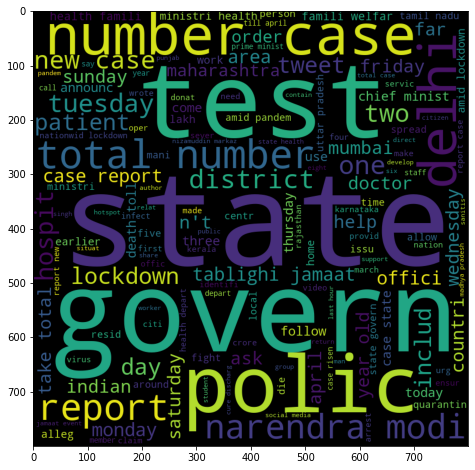

In [16]:
# word cloud
processed_corpus= " ".join(reviews.Processed_DESCRIPTION.values)

word_cloud = WordCloud(width=800,height=800,background_color='black',max_words=150).generate_from_text(processed_corpus)
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

## 8 Processed Data- Frequency count and Bar plot

In [17]:
# counting frequency of each words in corpus in fdist(freq. distribution)
# proc_fdist[word]=count

proc_fdist = {}
all_terms = processed_corpus.split(" ")
for word in all_terms:
    proc_fdist[word] = proc_fdist.get(word, 0) + 1
    
# proc_fdist(keys=values)


,words,freq
6,case,678
12,state,463
2,report,347
255,lockdown,341
217,govern,322
...,...,...
3640,laksmana,1
3641,brahm,1
3642,kanchibotla,1
3643,york,1


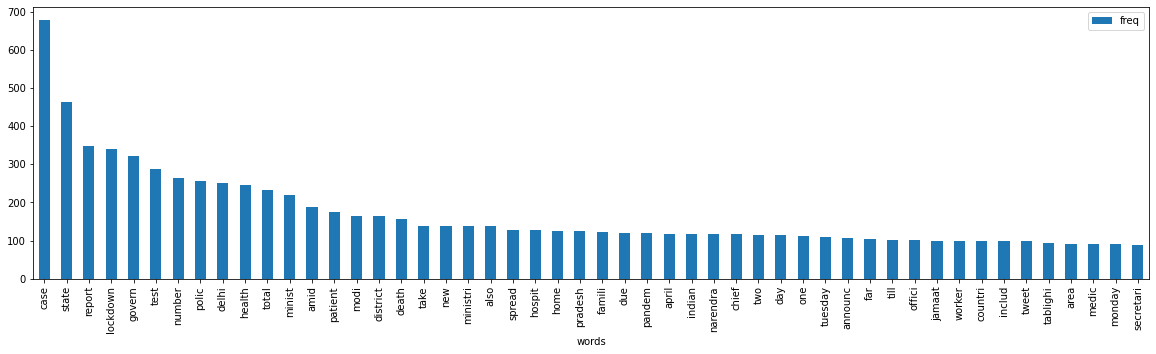

In [18]:
# proc_fdist(keys: values)
# to get all keys: keys= proc_fdist.keys()
# to get all values: val= proc_fdist.values()


freq = {"words":list(proc_fdist.keys()),"freq":list(proc_fdist.values())}
df_dist = pd.DataFrame(freq)
# df_dist

df_dist= df_dist.sort_values(ascending=False, by="freq")
df_dist.head(50).plot.bar(x= "words", y= "freq",figsize=(20,5)) 
df_dist

# SENTIMENT ANALYSIS : TOKEN BASED SCORING

In [58]:
afinn = pd.read_csv("AFINN-111.txt", sep="\t", header=None)
term_scores = dict(afinn.values)

In [59]:
def get_sentiment(statement):
    # statement : "tamil nadu report low daili case"
    tokens = word_tokenize(statement.lower())
    # tokens = statement.split(" ")
    #tokens : [tamil,nadu,report,low,daili,case]
    score = 0
    for word in tokens:
        score += term_scores.get(word, 0)
        # score = score+term_scores.get(word, 0)
    return score

In [60]:
reviews['sent_score'] = reviews.Processed_DESCRIPTION.apply(get_sentiment)

In [61]:
reviews['sent_pred']= reviews.sent_score.apply(lambda score: 'positive' if score>1 else 'negative' if score<-1 else 'neutral')

In [62]:
reviews

,DESCRIPTION,Processed_DESCRIPTION,sent_score,sent_pred
0,Tamil Nadu reported its lowest daily increase ...,tamil nadu report lowest daili increas case da...,-4,negative
1,Uttar Pradesh has reported a total of 657 coro...,uttar pradesh report total 657 case state prin...,-5,negative
2,A geographical area where six or more people t...,geograph area six test consid hotspot area ste...,2,positive
3,Rajasthan has reported 72 new coronavirus case...,rajasthan report new case till tuesday take to...,0,neutral
4,The total number of coronavirus cases in Karna...,total number case karnataka risen 260 state he...,-2,negative
...,...,...,...,...
1121,Microsoft CEO Satya Nadella's wife Anupama Nad...,microsoft ceo satya nadella wife anupama nadel...,0,neutral
1122,The government on Tuesday reduced the interest...,govern tuesday reduc interest rate small save ...,7,positive
1123,A youth was allegedly thrashed by policemen an...,youth alleg thrash policemen forc drink urin a...,-1,neutral
1124,Uttar Pradesh CM Yogi Adityanath has ordered a...,uttar pradesh yogi adityanath order action off...,-2,negative


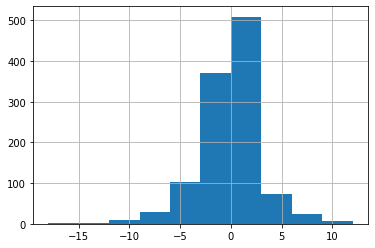

In [63]:
reviews.sent_score.hist()
plt.show()

In [25]:
# reviews.to_excel("sent_output.xlsx")